In [13]:
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.lstm_vi_softplus_predictor import (
    LSTMViSoftplusPredictor as Model,
)
from vol_predict.models.baselines.naive_predictor import NaivePredictor as Baseline

from run import run_backtest, initialize_bayesian_sequential_runner

In [15]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_bayesian_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


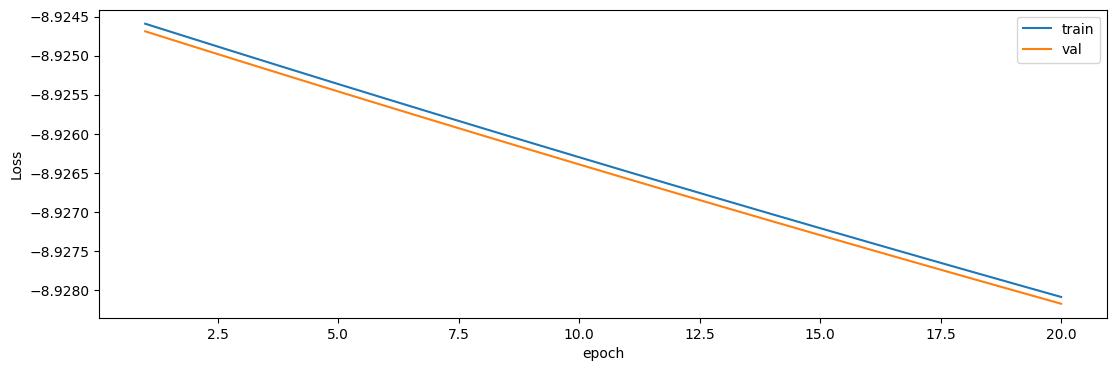

In [16]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [17]:
result

,model_loss,baseline_loss,true_returns,true_vols,model_preds,model_uncerts,baseline_preds
datetime,,,,,,,
2018-06-30,-9.479564,-8.309954,"[-0.0026883667, -0.004259642, 0.0017928587, 0....","[0.00041156381, 0.0004322233, 0.00021497025, 0...","[6.484775e-05, 6.794699e-05, 6.80662e-05, 6.74...","[[0.0], [0.0], [7.312612e-12], [7.312612e-12],...","[0.00023757516, 0.00023757516, 0.00023757516, ..."
2018-07-03,-8.616585,-8.050256,[-0.008161686],[0.00024051484],[6.6158966e-05],[[0.0]],[0.00024235305]
2018-07-04,-8.964016,-8.145232,"[0.00045824194, 0.001279179, -0.00041435525, 0...","[0.00017250539, 0.00017690947, 0.00018171575, ...","[7.295342e-05, 7.295342e-05, 7.2715025e-05, 7....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.00024579046, 0.00024579046, 0.00024579046, ..."
2018-07-05,-9.310833,-8.246642,"[-0.0025450767, 0.0020725208, -0.0004954421, -...","[0.00021121168, 0.0001595019, 0.00016921855, 0...","[7.3072624e-05, 7.557582e-05, 7.462223e-05, 7....","[[0.0], [7.312612e-12], [0.0], [0.0], [0.0], [...","[0.00024769365, 0.00024769365, 0.00024769365, ..."
2018-07-06,-9.408115,-8.243727,"[0.004517578, -0.0020303084, -0.0006618499, -0...","[7.636556e-05, 6.373772e-05, 0.00017979922, 8....","[6.830459e-05, 6.6754976e-05, 6.8185385e-05, 6...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.00024948214, 0.00024948214, 0.00024948214, ..."
...,...,...,...,...,...,...,...
2018-09-26,-9.998332,-9.099469,"[0.0008025224, -0.0018516219, 0.0015779294, 0....","[1.0667841e-05, 1.7913802e-05, 4.319444e-06, 4...","[3.2305197e-05, 3.194758e-05, 3.2424403e-05, 3...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[9.989233e-05, 9.989233e-05, 9.989233e-05, 9.9..."
2018-09-27,-9.543926,-8.957470,"[0.0025939993, -0.0004280163, -0.003148001, -0...","[1.11729005e-05, 7.5437806e-06, 8.304065e-06, ...","[3.2066786e-05, 3.1351556e-05, 3.1828375e-05, ...","[[0.0], [3.656306e-12], [0.0], [0.0], [0.0], [...","[9.945006e-05, 9.945006e-05, 9.945006e-05, 9.9..."
2018-09-28,-9.773195,-9.027375,"[-0.0022302242, 0.00031208308, 0.0011399924, 0...","[4.492918e-05, 1.22871825e-05, 6.9373027e-06, ...","[3.0278703e-05, 3.0993935e-05, 3.0517112e-05, ...","[[1.828153e-12], [0.0], [0.0], [1.828153e-12],...","[9.89275e-05, 9.89275e-05, 9.89275e-05, 9.8927..."


In [18]:
from sklearn.metrics import root_mean_squared_error

rmse = []
for date, row in result.iterrows():
    rmse.append(
        [
            date,
            root_mean_squared_error(row.true_vols, row.model_preds),
            root_mean_squared_error(row.true_vols, row.baseline_preds),
        ]
    )

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

In [19]:
rmse.mean(axis=0)

model       0.000151
baseline    0.000152
dtype: float64

In [20]:
rmse.std(axis=0)

model       0.000180
baseline    0.000166
dtype: float64

In [22]:
result.to_csv(f"Retrain_Bayesian_{runner.model_config.n_epochs}.csv")